# UNSW

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
def plot_attacktype_percentage(data1, data2, column):
    """
    绘制两个数据集（data1和data2）中攻击类别占比的柱状图
    """


    # 处理data1的数据，获取各分类的频次统计及百分比占比，并转换为DataFrame
    counts1 = data1[column].value_counts()
    percentages1 = (counts1 / counts1.sum()) * 100
    percentages_df1 = percentages1.reset_index()
    percentages_df1.columns = [column, 'percentage']

    # 处理data2的数据，获取各分类的频次统计及百分比占比，并转换为DataFrame
    counts2 = data2[column].value_counts()
    percentages2 = (counts2 / counts2.sum()) * 100
    percentages_df2 = percentages2.reset_index()
    percentages_df2.columns = [column, 'percentage']

    # 设置中文字体为黑体（解决中文显示问题，Windows系统下示例，Linux等其他系统按需调整字体设置）
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 解决负号显示问题
    plt.rcParams['axes.unicode_minus'] = False

    # 创建包含两个子图的布局，1行2列
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # 在第一个子图（ax1）中绘制data1的柱状图
    sns.barplot(x=column, y='percentage', data=percentages_df1, palette="Set1", ax=ax1)
    ax1.set_title('训练集攻击类别占比统计')
    ax1.set_xlabel('攻击类别')
    ax1.set_ylabel('百分比')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    for index, row in percentages_df1.iterrows():
        ax1.text(index, row['percentage'] + 0.5, f"{row['percentage']:.2f}%", ha='center')

    # 在第二个子图（ax2）中绘制data2的柱状图
    sns.barplot(x=column, y='percentage', data=percentages_df2, palette="Set1", ax=ax2)
    ax2.set_title('测试集攻击类别占比统计')
    ax2.set_xlabel('攻击类别')
    ax2.set_ylabel('百分比')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    for index, row in percentages_df2.iterrows():
        ax2.text(index, row['percentage'] + 0.5, f"{row['percentage']:.1f}%", ha='center')

    # 调整子图之间的间距等布局设置
    plt.tight_layout()

    # 显示图表
    plt.show()

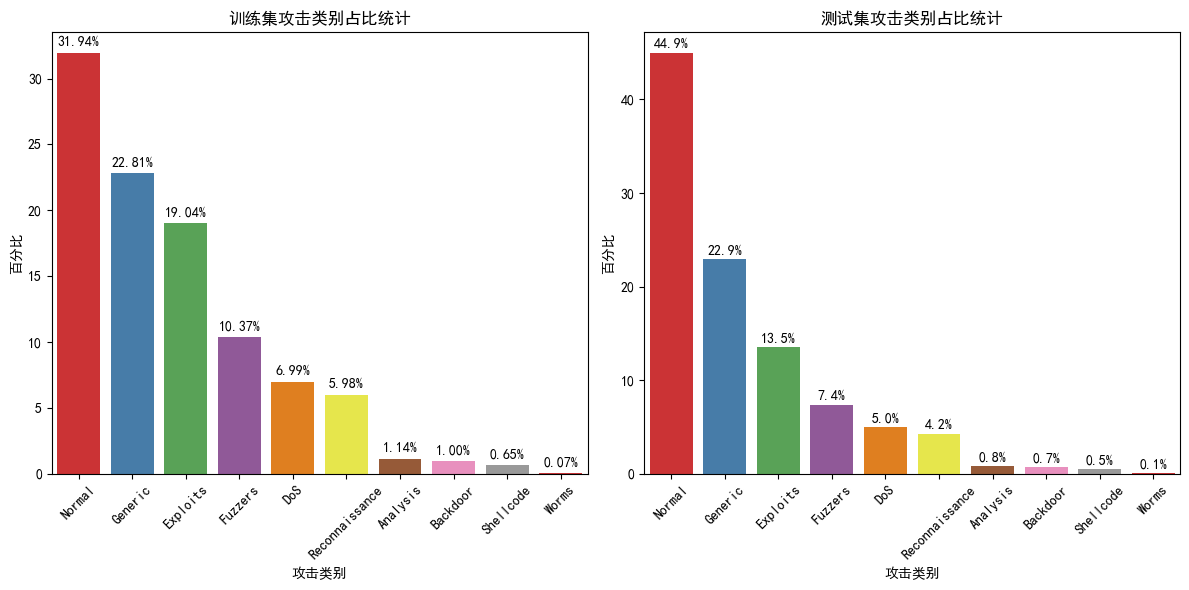

In [2]:
data1=pd.read_csv('UNSW_NB15_training-set.csv')
data2=pd.read_csv('UNSW_NB15_testing-set.csv')
plot_attacktype_percentage(data1,data2,'attack_cat')

数据预处理

In [ ]:
data=pd.concat([data1,data2],ignore_index=True)
len_d1=len(data1)
data.drop(columns=['attack_cat'], inplace=True)
category_columns = ['proto', 'service', 'state']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[category_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(category_columns))
data = pd.concat([data, encoded_df], axis=1).drop(columns=category_columns)
data.drop(columns=['id'], inplace=True)
data[:len_d1].to_csv('en_UNSW_NB15_train.csv', index=False)
data[len_d1:].to_csv('en_UNSW_NB15_test.csv', index=False)

# NSL-KDD

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [4]:
data1=pd.read_csv('NSL_KDD_Train.csv',header=None, names = col_names)
data2=pd.read_csv('NSL_KDD_Test.csv',header=None, names = col_names)

某一列只有一个固定值

In [5]:
columns=data1.columns
for column in columns:
    # print(f"Unique values in column '{column}': {data1[column].nunique()}")
    # 假设 df 是你的 DataFrame，'column_name' 是你要检查的列名
    n = data1[column].nunique()
    if n <= 1:
        print(f"The column '{column}' contains only {n} unique value.")
    # else:
        # print(f"The column '{column}' contains multiple unique values.")


The column 'num_outbound_cmds' contains only 1 unique value.


每种攻击对应的攻击类型

In [6]:
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

label标签分布

In [7]:
label1=data1['label'].unique()
label2=data2['label'].unique()
set1=set(label1)
set2=set(label2)
print("二者共同标签")
print(set1&set2)
print("只在训练集出现的标签")
print(set1-set2)
print("只在测试集出现的标签")
print(set2-set1)


二者共同标签
{'smurf', 'back', 'portsweep', 'phf', 'pod', 'multihop', 'ipsweep', 'imap', 'teardrop', 'land', 'ftp_write', 'satan', 'rootkit', 'buffer_overflow', 'guess_passwd', 'warezmaster', 'nmap', 'loadmodule', 'neptune', 'normal', 'perl'}
只在训练集出现的标签
{'warezclient', 'spy'}
只在测试集出现的标签
{'apache2', 'httptunnel', 'named', 'snmpguess', 'udpstorm', 'xsnoop', 'ps', 'processtable', 'mailbomb', 'saint', 'snmpgetattack', 'mscan', 'xterm', 'xlock', 'sendmail', 'sqlattack', 'worm'}


In [9]:
data=pd.concat([data1,data2],ignore_index=True)
# 新增一列
data['class'] = data['label'].apply(lambda x: attack_dict[x])
# 删除固定值列
data.drop('num_outbound_cmds', axis=1, inplace=True)
data['label2'] = data['label'].apply(lambda x: 0 if x == 'normal' else 1)
category_columns = ['protocol_type', 'service', 'flag']
len_d1=len(data1)
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[category_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(category_columns))
data = pd.concat([data, encoded_df], axis=1).drop(columns=category_columns)
data[:len_d1].to_csv('en_KDDTrain+.csv', index=False)
data[len_d1:].to_csv('en_KDDTest+.csv', index=False)

In [90]:
data1['class'].value_counts()

class
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [10]:
data1 = data[:len_d1]
data2 = data[len_d1:]

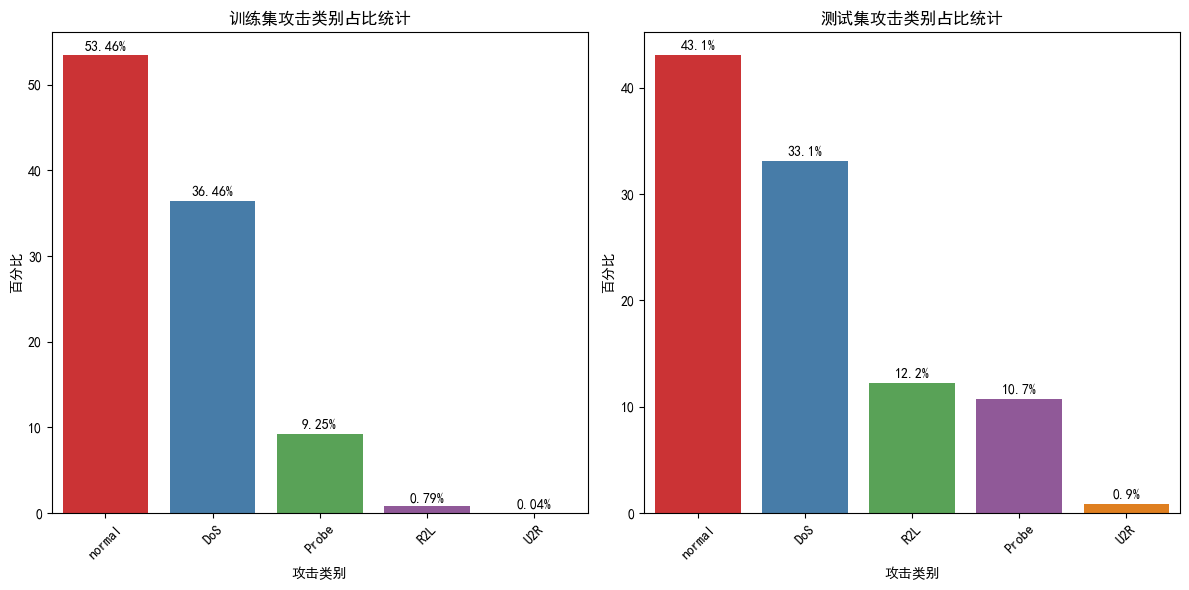

In [11]:
plot_attacktype_percentage(data1,data2,'class')